In [1]:
from ema_workbench import Scenario, Policy, MultiprocessingEvaluator, ema_logging, load_results, save_results
from ema_workbench.analysis import prim
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.em_framework.evaluators import BaseEvaluator

from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ema_workbench.analysis import parcoords
import seaborn as sns
import random
from sklearn import preprocessing

In [2]:
ACTORNAME = "Gorssel"
dike_model, planning_steps = get_model_for_problem_formulation(ACTORNAME)
outcomekeys = [outcome.name for outcome in dike_model.outcomes]

# Scenario selection

In [3]:
ACTOR = "genscen_Gorssel_50000_12-06-2021-03-06-15.tar.gz"
experiments, outcomes = load_results("simulation/generated/" + ACTOR)
outcomes_df = pd.DataFrame(outcomes)

In [4]:
outcomes_df.columns.values.tolist()

['Difference in Expected Annual Damage Gorssel-Deventer',
 'Difference in Expected Number of Deaths Gorssel-Deventer',
 'Gorssel Expected Annual Damage',
 'Gorssel Expected Number of Deaths',
 'Gorssel Total Costs']

In [5]:
outcomes_df

,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs
0,-1219.596387,-9.711846e-07,9.488213e+06,0.004926,0.0
1,-393.024418,-2.241158e-07,3.958503e+07,0.022573,0.0
2,-1511.088849,-6.855404e-07,1.521954e+08,0.069047,0.0
3,-149.944611,-9.245500e-08,1.510227e+07,0.009312,0.0
4,-536.744525,-3.516669e-07,5.406037e+07,0.035420,0.0
...,...,...,...,...,...
49995,-695.221991,-3.872856e-07,7.002206e+07,0.039007,0.0
49996,-3266.659209,-2.565056e-06,7.221858e+07,0.034183,0.0
49997,-300.839149,-1.813858e-07,1.075421e+07,0.004638,0.0
49998,-6792.876649,-5.842054e-06,1.203924e+07,0.005334,0.0


In [6]:
DAMAGE = outcomes_df.columns[2]
DEATHS = outcomes_df.columns[3]
COSTS = outcomes_df.columns[4]

We are interested in the correlation between Deaths and Damage

In [7]:
outcomes_df[DAMAGE].corr(outcomes_df[DEATHS])

0.9776021595504575

So the correlation is INSANE

In [8]:
results = pd.concat([experiments, outcomes_df], axis=1)

In [9]:
uncertainties =list(dike_model.uncertainties._data.keys())

In [10]:
print(outcomes_df.idxmax())
print(outcomes_df.idxmin())

Difference in Expected Annual Damage Gorssel-Deventer        138
Difference in Expected Number of Deaths Gorssel-Deventer     138
Gorssel Expected Annual Damage                              6013
Gorssel Expected Number of Deaths                            631
Gorssel Total Costs                                            0
dtype: int64
Difference in Expected Annual Damage Gorssel-Deventer       47744
Difference in Expected Number of Deaths Gorssel-Deventer    22031
Gorssel Expected Annual Damage                                  7
Gorssel Expected Number of Deaths                               7
Gorssel Total Costs                                             0
dtype: int64


In [11]:
middle_damage_df = results.loc[(results[DAMAGE] > np.percentile(a=outcomes[DAMAGE], q=23)) & (results[DAMAGE] <= np.percentile(a=outcomes[DAMAGE], q=27))]
middle_deaths_df = results.loc[(results[DEATHS] > np.percentile(a=outcomes[DEATHS], q=23)) & (results[DEATHS] <= np.percentile(a=outcomes[DEATHS], q=27))]
twentyfive = random.choice(list(set(middle_damage_df["scenario"].tolist()) & set(middle_deaths_df["scenario"].tolist())))

In [12]:
middle_damage_df = results.loc[(results[DAMAGE] > np.percentile(a=outcomes[DAMAGE], q=48)) & (results[DAMAGE] <= np.percentile(a=outcomes[DAMAGE], q=52))]
middle_deaths_df = results.loc[(results[DEATHS] > np.percentile(a=outcomes[DEATHS], q=48)) & (results[DEATHS] <= np.percentile(a=outcomes[DEATHS], q=52))]
fifty = random.choice(list(set(middle_damage_df["scenario"].tolist()) & set(middle_deaths_df["scenario"].tolist())))

In [13]:
middle_damage_df = results.loc[(results[DAMAGE] > np.percentile(a=outcomes[DAMAGE], q=73)) & (results[DAMAGE] <= np.percentile(a=outcomes[DAMAGE], q=77))]
middle_deaths_df = results.loc[(results[DEATHS] > np.percentile(a=outcomes[DEATHS], q=73)) & (results[DEATHS] <= np.percentile(a=outcomes[DEATHS], q=77))]
seventyfive = random.choice(list(set(middle_damage_df["scenario"].tolist()) & set(middle_deaths_df["scenario"].tolist())))

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
damage_scaled = min_max_scaler.fit_transform(pd.DataFrame(outcomes[DAMAGE]).values)
deaths_scaled = min_max_scaler.fit_transform(pd.DataFrame(outcomes[DEATHS]).values)
scaled = (damage_scaled + deaths_scaled)/2

In [15]:
outcomes_df["Scaled"] = scaled
SCALED = 'Scaled'

In [16]:
outcomes_df.sort_values(by="Scaled", ascending=False).head(1).index[0]

6013

In [17]:
idx = [outcomes_df.idxmin()[DAMAGE], twentyfive, fifty, seventyfive, outcomes_df.idxmax()[DEATHS], outcomes_df.idxmax()[DAMAGE]]
idx

[7, 22301, 31243, 14140, 631, 6013]

Wow, worst damage is the same as absolute worst. wowowowowo

In [18]:
cases = {0: "best", 1: "low", 2: "middle", 3: "high", 4: "worst deaths", 5: "absolute worst"}

In [19]:
selected = results.iloc[idx]

In [20]:
selected = selected.loc[:,  uncertainties]

In [21]:
scenarios = [Scenario(f"{index}", **row) for index, row in selected.iterrows()]

In [22]:
outcomes_df.describe()

,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs,Scaled
count,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.0,50000.000000
mean,-2195.842747,-1.820303e-06,4.394637e+07,0.021209,0.0,0.236309
std,2558.744855,2.280280e-06,4.660492e+07,0.020512,0.0,0.236181
min,-16316.748534,-1.057313e-05,0.000000e+00,0.000000,0.0,0.000000
25%,-2541.739195,-2.238291e-06,7.665181e+06,0.004574,0.0,0.046843
50%,-1213.798597,-7.219704e-07,1.998865e+07,0.010051,0.0,0.109276
75%,-622.485415,-3.796526e-07,6.780248e+07,0.033520,0.0,0.370520
max,0.000000,0.000000e+00,2.294422e+08,0.075454,0.0,0.996574


# Optimisation

In [23]:
hypervolumemin = [0,0,0]
hypervolumemax = outcomes_df[outcomekeys[2:]].max(axis=0).values.tolist()

In [24]:
hypervolumemax[2] = 1.15e9

In [25]:
ema_logging.log_to_stderr(ema_logging.INFO)

nfe = 2000 + 1000

def optimize(scenario, nfe, model, converge_metrics, epsilons):


    with MultiprocessingEvaluator(model) as evaluator:
        results, convergence = evaluator.optimize(nfe=nfe, searchover='levers',
                                     convergence=convergence_metrics,
                                     epsilons=epsilons,
                                     reference=scenario, convergence_freq=200)
    return results, convergence

results = []
for scenario in scenarios:
    convergence_metrics = [HyperVolume(minimum=hypervolumemin, maximum=hypervolumemax),
                           EpsilonProgress()]
    epsilons = [1e4, 0.001, 1e5]
    
    
    
    results.append(optimize(scenario, nfe, dike_model, convergence_metrics, epsilons))


[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/3000 nfe
[MainProcess/INFO] generation 5: 499/3000 nfe
[MainProcess/INFO] generation 10: 990/3000 nfe
[MainProcess/INFO] generation 15: 1480/3000 nfe
[MainProcess/INFO] generation 20: 1973/3000 nfe
[MainProcess/INFO] generation 25: 2462/3000 nfe
[MainProcess/INFO] generation 30: 2955/3000 nfe
[MainProcess/INFO] optimization completed, found 1 solutions
[MainProcess/INFO] terminating pool
[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/3000 nfe
[MainProcess/INFO] generation 5: 499/3000 nfe
[MainProcess/INFO] generation 10: 998/3000 nfe
[MainProcess/INFO] generation 15: 1496/3000 nfe
[MainProcess/INFO] generation 20: 1987/3000 nfe
[MainProcess/INFO] generation 25: 2478/3000 nfe
[MainProcess/INFO] generation 30: 2968/3000 nfe
[MainProcess/INFO] optimization completed, found 2 solutions
[MainProcess/INFO] terminating pool
[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/3000 nfe
[MainPro

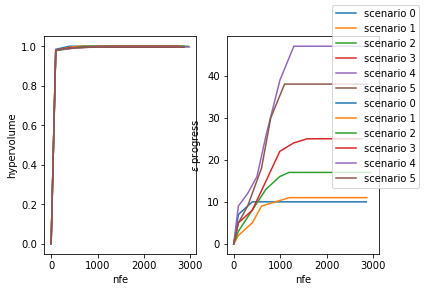

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2,sharex=True)
for i, (_, convergence) in enumerate(results):
    ax1.plot(convergence.nfe, convergence.hypervolume, label=f'scenario {i}')
    ax2.plot(convergence.nfe, convergence.epsilon_progress, label=f'scenario {i}')

ax1.set_ylabel('hypervolume')
ax1.set_xlabel('nfe')
ax2.set_ylabel('$\epsilon$ progress')
ax2.set_xlabel('nfe')
fig.legend()
plt.show()

# Saving

In [27]:
for i, (result, convergence) in enumerate(results):
    result.to_csv("simulation/optimisation/" + ACTORNAME + "/results_" + cases[i] +".csv", index=False)
    convergence.to_csv("simulation/optimisation/" + ACTORNAME + "/convergence_" + cases[i] +".csv", index=False)

In [28]:
selected.to_csv("simulation/optimisation/" + ACTORNAME + "/selected.csv", index=False)

# Re-evaluate under deep uncertainty

In [29]:
n_scenarios = 1000

In [30]:
levers = [lever.name for lever in dike_model.levers]

In [31]:
policies = []
for i, (result, _) in enumerate(results):
    result = result.loc[:, levers]
    for j, row in result.iterrows():
        policy = Policy(f'scenario {cases[i]} option {j}', **row.to_dict())
        policies.append(policy)

In [32]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    reevaluation_results = evaluator.perform_experiments(n_scenarios, policies=policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 27 policies * 1 model(s) = 27000 experiments
[MainProcess/INFO] 2700 cases completed
[MainProcess/INFO] 5400 cases completed
[MainProcess/INFO] 8100 cases completed
[MainProcess/INFO] 10800 cases completed
[MainProcess/INFO] 13500 cases completed
[MainProcess/INFO] 16200 cases completed
[MainProcess/INFO] 18900 cases completed
[MainProcess/INFO] 21600 cases completed
[MainProcess/INFO] 24300 cases completed
[MainProcess/INFO] 27000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


# Saving

In [33]:
save_results(reevaluation_results, "simulation/optimisation/du_scen_" + str(n_scenarios) + "_" + ACTORNAME + ".tar.gz")

[MainProcess/INFO] results saved successfully to /Users/emilyryan/Dropbox/EPA/EPA1361/FabiosDecisions/epa1361/final assignment/data/optimisation/du_scen_1000_Gorssel.tar.gz
